<h1 style="text-align:center;">Electronic Sales Analysis</h1>                   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Electronic_Sales_Data.csv',encoding = 'unicode_escape')

In [3]:
df.shape

(20000, 17)

In [4]:
df.head()

,Customer ID,Age,Age Group,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,53-64,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,20-03-2024,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,53-64,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,20-04-2024,Overnight,Impulse Item,26.09
2,1002,41,39-45,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,17-10-2023,Express,NaN,0.00
3,1002,41,39-45,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,09-08-2024,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,65-80,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,21-05-2024,Express,Accessory,35.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Age Group          20000 non-null  object 
 3   Gender             19999 non-null  object 
 4   Loyalty Member     20000 non-null  object 
 5   Product Type       20000 non-null  object 
 6   SKU                20000 non-null  object 
 7   Rating             20000 non-null  int64  
 8   Order Status       20000 non-null  object 
 9   Payment Method     20000 non-null  object 
 10  Total Price        20000 non-null  float64
 11  Unit Price         20000 non-null  float64
 12  Quantity           20000 non-null  int64  
 13  Purchase Date      20000 non-null  object 
 14  Shipping Type      20000 non-null  object 
 15  Add-ons Purchased  15132 non-null  object 
 16  Add-on Total       200

In [6]:
df.drop(['Add-ons Purchased'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum()

Customer ID       0
Age               0
Age Group         0
Gender            1
Loyalty Member    0
Product Type      0
SKU               0
Rating            0
Order Status      0
Payment Method    0
Total Price       0
Unit Price        0
Quantity          0
Purchase Date     0
Shipping Type     0
Add-on Total      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.rename(columns={'Total Price': 'Amount'},inplace=True )

In [10]:
df['Amount'] =df['Amount'].astype('int')

In [11]:
df.columns

Index(['Customer ID', 'Age', 'Age Group', 'Gender', 'Loyalty Member',
       'Product Type', 'SKU', 'Rating', 'Order Status', 'Payment Method',
       'Amount', 'Unit Price', 'Quantity', 'Purchase Date', 'Shipping Type',
       'Add-on Total'],
      dtype='object')

In [25]:
custom_palette=['#006A67', '#FAB12F']
custom_new=['#264653', '#287271', '#2A9D8F', '#E9C46A','#F4A261','#EE8959','#E76F51']
custom_new1=['#264653','#287271','#2a9d8f','#8ab17d','#e9c46a','#f4a261','#e76f51']
one=['#264653','#E9C46A']
two=['#f47068','#ffb3ae','#ddb892','#1697a6','#0e606b','#ffc24b']

##                     Exploratory Data Analysis

### Gender

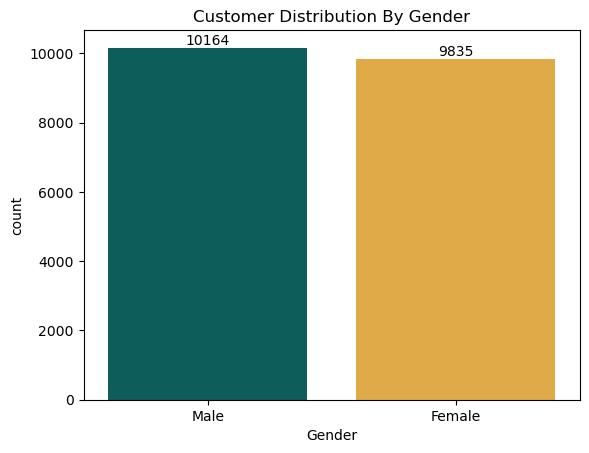

In [13]:
data=sns.countplot(x='Gender', data=df, palette= custom_palette)
plt.title("Customer Distribution By Gender")
for bars in data.containers:
    data.bar_label(bars)

Text(0.5, 1.0, 'Purchase Amount By Gender')

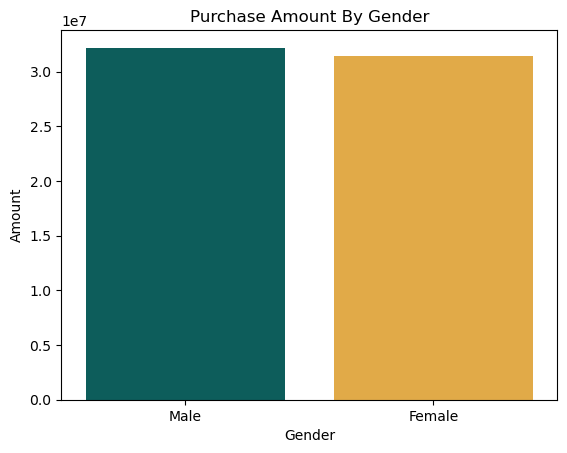

In [14]:
sales=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False) 
sns.barplot(x='Gender', y='Amount', data= sales, palette= custom_palette)
plt.title('Purchase Amount By Gender')

from above graphs we can see that male customers made slightly more purchases than female customers

### Age

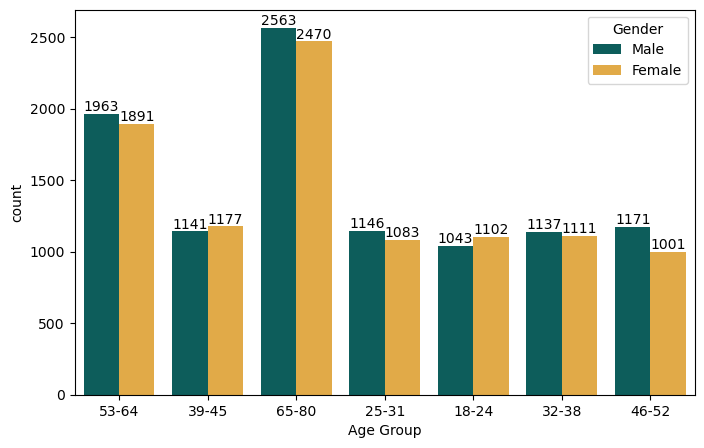

In [15]:
plt.figure(figsize=(8,5))
data1= sns.countplot(x='Age Group', data=df, hue='Gender', palette= custom_palette)
for bars in data1.containers:
    data1.bar_label(bars)

Text(0.5, 1.0, 'Customer Spending Behavior by Age Segment')

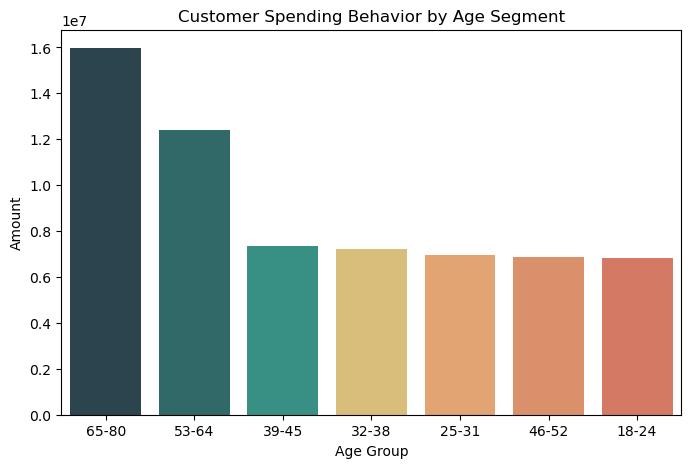

In [30]:
plt.figure(figsize=(8,5))
sales_age =df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x= 'Age Group', y= 'Amount', data = sales_age, palette= custom_new)
plt.title('Customer Spending Behavior by Age Segment')

From above graphs we can see that most of the buyers are of age group 65-80yrs male

### Product Category

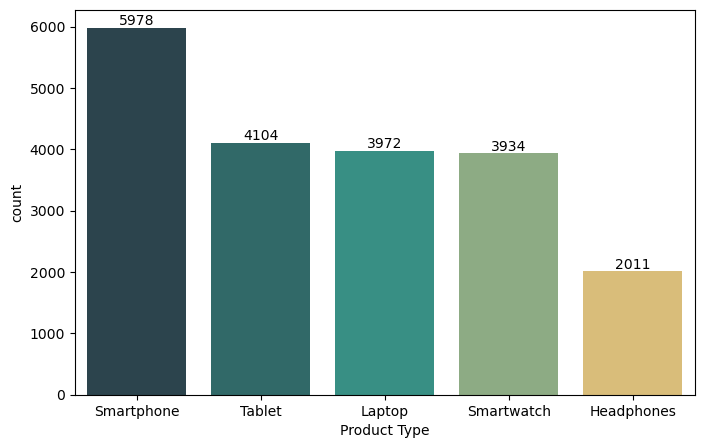

In [18]:
plt.figure(figsize=(8,5))
data=sns.countplot(x='Product Type', data=df,palette= custom_new1)
for bars in data.containers:
    data.bar_label(bars)

Text(0.5, 1.0, 'Customer Spending Pattern Across Product Type')

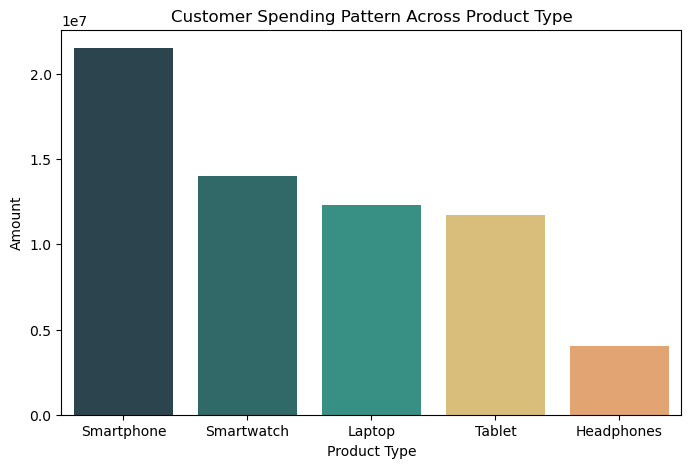

In [31]:
data_type=df.groupby(['Product Type'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Product Type', y='Amount', data=data_type, palette= custom_new)
plt.title('Customer Spending Pattern Across Product Type')


From above graph we can see that smartphones are the most purchased product

Text(0.5, 1.0, 'Product Sales Peformance by Age Demographics: Smartphone vs Smartwatches')

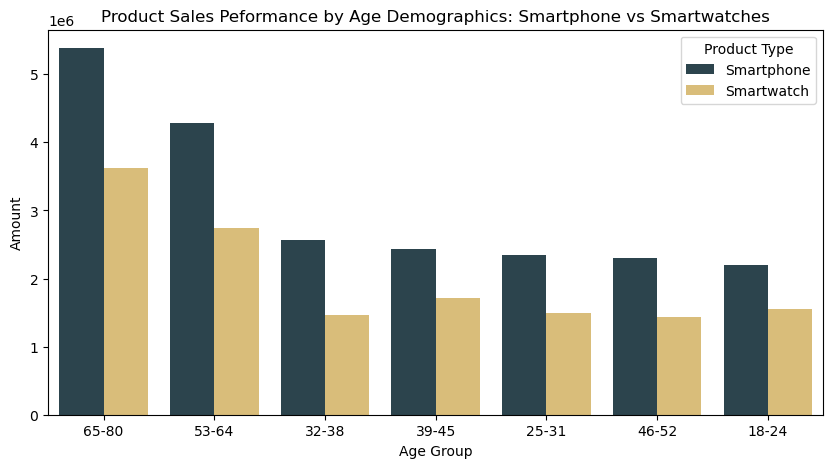

In [29]:
selected_products=['Smartphone','Smartwatch']
data_type=df.groupby(['Product Type','Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
data_type=data_type[data_type[ 'Product Type'].isin(selected_products)]
plt.figure(figsize=(10,5))
sns.barplot(x='Age Group', y='Amount', data=data_type, hue='Product Type',palette=one)
plt.title('Product Sales Peformance by Age Demographics: Smartphone vs Smartwatches')


Customers aged 65-80 recorded the highest purchase amount, with smartphones  being their most preferred product

### Payment Method

<Axes: xlabel='Payment Method', ylabel='Amount'>

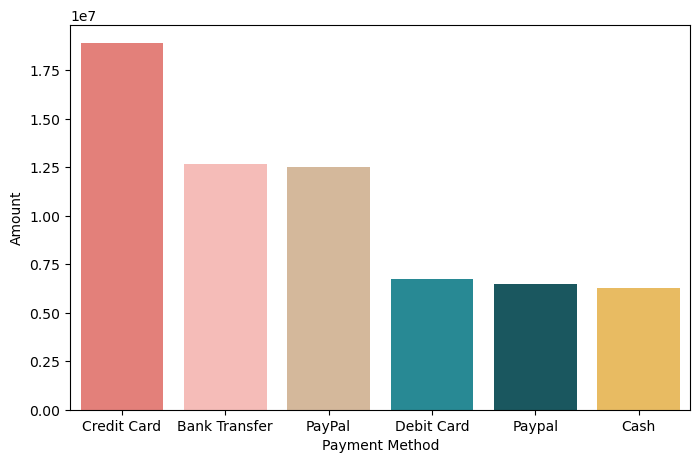

In [28]:
data_method=df.groupby(['Payment Method'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Payment Method', y='Amount', data=data_method, palette= two)


Most of the transaction were made using credit cards, indicating a preference for this payment method among customers

### Summary

Electronic sales are highest among male customers, especially those aged 65–80, who show a strong preference for smartphones. Most transactions are completed using credit cards, indicating both product and payment trends in customer behavior